<a href="https://colab.research.google.com/github/Debangana-chatterjee/Fake-news-Detection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
stopwords=nltk.corpus.stopwords.words('english')
wordnet_lemmatizer=WordNetLemmatizer()

In [7]:
trueData=pd.read_csv("/content/drive/MyDrive/Datasets/Fake news dataset/True.csv")
fakeData=pd.read_csv("/content/drive/MyDrive/Datasets/Fake news dataset/Fake.csv")

In [8]:
fakeData.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
fakeData['real']=0
trueData['real']=1

In [10]:
fakeData.head()

,title,text,subject,date,real
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:
trueData.head()

,title,text,subject,date,real
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [12]:
df=pd.concat([fakeData,trueData],ignore_index=True)

In [13]:
df.sample(5)

,title,text,subject,date,real
6082,Former CIA Director Says Trump Is Actually HE...,Donald Trump s idiotic followers may believe t...,News,"June 1, 2016",0
20591,WHY OBAMA’S LAWSUIT AGAINST NC Is Really About...,Obama is clearly attempting to strip Americans...,left-news,"May 11, 2016",0
25567,Pakistani army says it has acted against milit...,ISLAMABAD (Reuters) - Pakistan has taken actio...,politicsNews,"August 21, 2017",1
8038,Bette Midler Uses Cruz And Trump’s Own Insult...,Bette Midler has been busy sticking it to the ...,News,"February 17, 2016",0
32410,Biden outlines 'Moonshot' initiatives to fight...,WASHINGTON (Reuters) - U.S. Vice President Jos...,politicsNews,"June 29, 2016",1


In [14]:
print(df.real.value_counts())

real
0    23481
1    21417
Name: count, dtype: int64


In [15]:
print(df.subject.value_counts())

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


In [16]:
# Data Preprocessing

In [17]:
def cleanData(row):
    row = row.lower()
    row = re.sub('[^a-zA-Z]',' ',row)
    token = row.split()
    removeStop = [i for i in token if i not in stopwords]
    lemm_text_temp = [wordnet_lemmatizer.lemmatize(word,pos='v') for word in removeStop]
    lemm_text = [wordnet_lemmatizer.lemmatize(word,pos='n') for word in lemm_text_temp]
    cleaned_string = ""
    for word in lemm_text:
        cleaned_string+=word
        cleaned_string+= ' '
    return cleaned_string


In [18]:
df['cleaned_data']=df['text'].apply(lambda x:cleanData(x))
df

,title,text,subject,date,real,cleaned_data
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump wish american happy new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,friday reveal former milwaukee sheriff david c...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,christmas day donald trump announce would back...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope francis use annual christmas day message ...
...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,brussels reuters nato ally tuesday welcome pre...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,london reuters lexisnexis provider legal regul...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,minsk reuters shadow disused soviet era factor...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,moscow reuters vatican secretary state cardina...


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_data'], df['real'], test_size=0.2, random_state=42)

In [20]:
# Vectorization using TFIDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
vec_train_data = vect.fit_transform(X_train)
vec_test_data = vect.transform(X_test)

In [22]:
# Multinomial Naive-Bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB
MNB_clf = MultinomialNB()
MNB_clf.fit(vec_train_data, y_train)
MNB_pred = MNB_clf.predict(vec_test_data)

In [24]:
from sklearn.metrics import accuracy_score
MNB_accuracy = accuracy_score(y_test,MNB_pred)*100
MNB_accuracy

93.07349665924276

In [25]:
# LogisticRegression
# LinearSVC

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr_clf=LogisticRegression()
lr_clf.fit(vec_train_data, y_train)
lr_pred = lr_clf.predict(vec_test_data)
lr_accuracy = accuracy_score(y_test,lr_pred)*100
lr_accuracy

98.60801781737194

In [28]:
from sklearn.svm import LinearSVC

In [29]:
sv_clf=LinearSVC()
sv_clf.fit(vec_train_data, y_train)
sv_pred = sv_clf.predict(vec_test_data)
sv_accuracy = accuracy_score(y_test,sv_pred)*100
sv_accuracy

99.46547884187082

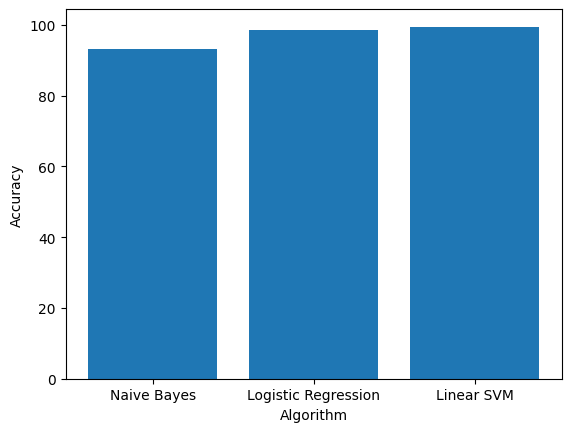

In [30]:
import matplotlib.pyplot as plt
x=['Naive Bayes','Logistic Regression','Linear SVM']
y=[MNB_accuracy,lr_accuracy,sv_accuracy]
plt.bar(x,y)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
import seaborn as sns
mnb_cnf_mtrx=confusion_matrix(y_test,MNB_pred)
mnb_cnf_mtrx

array([[4464,  269],
       [ 353, 3894]])

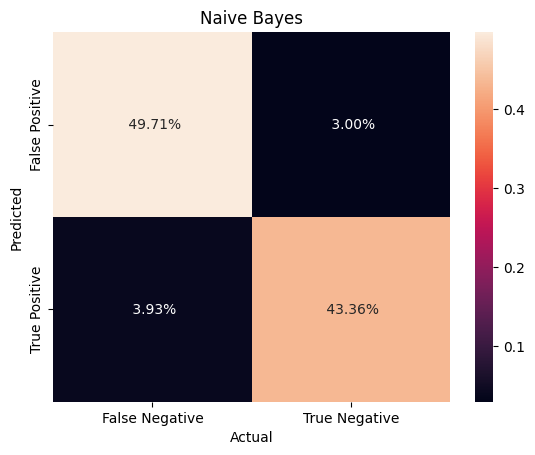

In [33]:
ax=sns.heatmap(mnb_cnf_mtrx/np.sum(mnb_cnf_mtrx),fmt=' .2%',annot=True)
ax.set_title("Naive Bayes")
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")
ax.xaxis.set_ticklabels(['False Negative','True Negative'])
ax.yaxis.set_ticklabels(['False Positive','True Positive'])
plt.show()

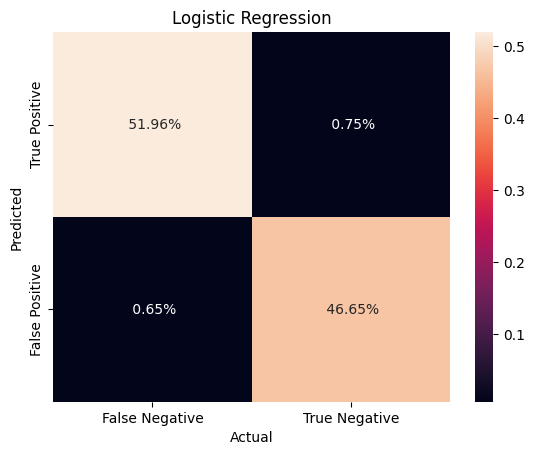

In [34]:
lr_cnf_mtrx=confusion_matrix(y_test,lr_pred)
ax=sns.heatmap(lr_cnf_mtrx/np.sum(lr_cnf_mtrx),fmt=' .2%',annot=True)
ax.set_title("Logistic Regression")
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")
ax.xaxis.set_ticklabels(['False Negative','True Negative'])
ax.yaxis.set_ticklabels(['True Positive','False Positive'])
plt.show()

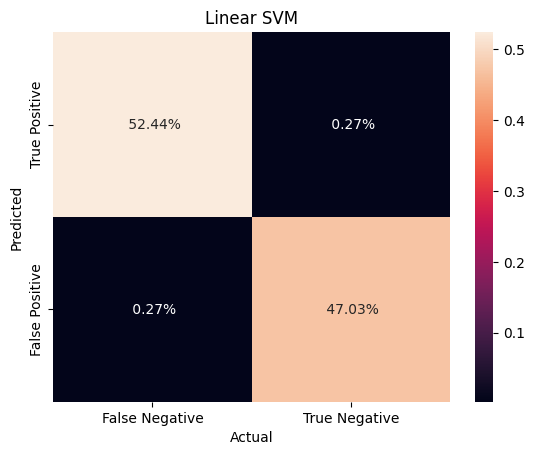

In [35]:
sv_cnf_mtrx=confusion_matrix(y_test,sv_pred)
ax=sns.heatmap(sv_cnf_mtrx/np.sum(sv_cnf_mtrx),fmt=' .2%',annot=True)
ax.set_title("Linear SVM")
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")
ax.xaxis.set_ticklabels(['False Negative','True Negative'])
ax.yaxis.set_ticklabels(['True Positive','False Positive'])
plt.show()

In [36]:
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(TfidfVectorizer(),MultinomialNB())
text_model.fit(X_train,y_train)
y_pred=text_model.predict(X_test)

In [37]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [38]:
import joblib
joblib.dump(text_model,'MNB')

['MNB']

In [39]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [42]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stopwords=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer=WordNetLemmatizer()
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def cleanData(row):
    row = row.lower()
    row = re.sub('[^a-zA-Z]',' ',row)
    token = row.split()
    removeStop = [i for i in token if i not in stopwords]
    lemm_text_temp = [wordnet_lemmatizer.lemmatize(word,pos='v') for word in removeStop]
    lemm_text = [wordnet_lemmatizer.lemmatize(word,pos='n') for word in lemm_text_temp]
    cleaned_string = ""
    for word in lemm_text:
        cleaned_string+=word
        cleaned_string+= ' '
    return cleaned_string

model = joblib.load('MNB')
st.title("Fake News")
ip=st.text_input("Enter message: ")
op=model.predict([cleanData(ip)])

if st.button("Detect"):
    if op==1:
        final='Real'
    else:
        final='Fake'
    st.subheader(f"The above news snippet is **{final}**.")



Overwriting app.py


In [43]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.233.191.234:8501

⠙⠹⠸⠼⠴your url is: https://mean-pigs-sniff.loca.lt
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data.